In [1]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_colwidth', -1)

In [2]:
default = pd.read_csv('./results/results_default.csv')

In [3]:
new = pd.read_csv('./results/results_new.csv')

In [4]:
selected_cols = ['model','hyper','metric','value']

In [5]:
default = default[selected_cols]

In [6]:
new = new[selected_cols]

In [7]:
default.model.unique()

array(['CollectiveMF_Item', 'CollectiveMF_User', 'CollectiveMF_No',
       'CollectiveMF_Both', 'surprise_SVD', 'surprise_Baseline',
       'PureRandom'], dtype=object)

In [8]:
#function to extract nested info
def split_params(df):
    join_table = df.copy()
    join_table["list_hyper"] = join_table["hyper"].apply(eval)
    join_table = join_table.explode("list_hyper")
    join_table["params_name"], join_table["params_val"] = zip(*join_table["list_hyper"])

    return join_table


In [9]:
color = ['lightpink','skyblue','lightgreen', "lightgrey", "navajowhite", "thistle"]
markerfacecolor = ['red', 'blue', 'green','grey', "orangered", "darkviolet" ]
marker = ['P', '^' ,'o', "H", "X", "p"]
fig_size=(6,4)

### Default server

In [10]:
default_split = split_params(default)[['model','metric','value','params_name','params_val']]

In [11]:
models = default_split.model.unique().tolist()

In [12]:
CollectiveMF_Item_set = default_split[default_split['model'] == models[0]]
CollectiveMF_User_set = default_split[default_split['model'] == models[1]]
CollectiveMF_No_set = default_split[default_split['model'] == models[2]]
CollectiveMF_Both_set = default_split[default_split['model'] == models[3]]
surprise_SVD_set = default_split[default_split['model'] == models[4]]
surprise_Baseline_set = default_split[default_split['model'] == models[5]]

## surprise_SVD

In [13]:
surprise_SVD_ndcg = surprise_SVD_set[(surprise_SVD_set['metric'] == 'ndcg@10')]
surprise_SVD_ndcg = surprise_SVD_ndcg.pivot(index= 'value', 
                                            columns='params_name', 
                                            values='params_val').reset_index(inplace = False)

In [14]:
surprise_SVD_ndcg = surprise_SVD_ndcg[surprise_SVD_ndcg.n_factors > 4]

In [15]:
n_factors = [10,50,100,150]
reg_all = [0.01,0.05,0.1,0.5]
lr_all = [0.002,0.005,0.01]


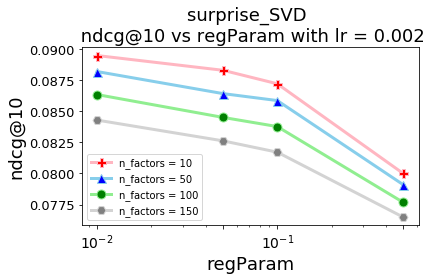

In [16]:
surprise_SVD_ndcg = surprise_SVD_ndcg.sort_values('reg_all')
fig, ax = plt.subplots(1,1, figsize = fig_size)
for i in range(4):
    labelstring = 'n_factors = '+ str(n_factors[i])
    ax.semilogx('reg_all', 'value', 
            data = surprise_SVD_ndcg.loc[(surprise_SVD_ndcg['lr_all'] == 0.002)&(surprise_SVD_ndcg['n_factors']== n_factors[i])],
            marker= marker[i], markerfacecolor=markerfacecolor[i], markersize=9,
            color= color[i], linewidth=3, label = labelstring)
ax.legend()
ax.set_ylabel('ndcg@10',fontsize = 18)
ax.set_xlabel('regParam',fontsize = 18)
ax.set_title('surprise_SVD \n ndcg@10 vs regParam with lr = 0.002',fontsize = 18)
ax.set_xticks(reg_all)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=13)
pic = fig
plt.tight_layout()


In [17]:
pic.savefig('figs/hyper/SVD_ndcg_vs_reg_factor.eps', format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


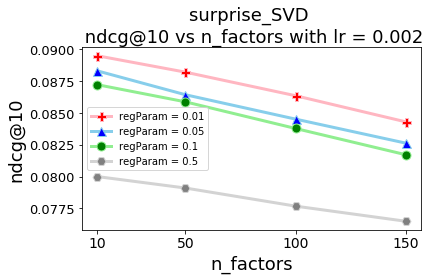

In [18]:
surprise_SVD_ndcg = surprise_SVD_ndcg.sort_values('n_factors')
fig, ax = plt.subplots(1,1, figsize = fig_size)
for i in range(4):
    labelstring = 'regParam = '+ str(reg_all[i])
    ax.plot('n_factors', 'value', 
            data = surprise_SVD_ndcg.loc[(surprise_SVD_ndcg['lr_all'] == 0.002)&(surprise_SVD_ndcg['reg_all']== reg_all[i])],
            marker= marker[i], markerfacecolor=markerfacecolor[i], markersize=9,
            color= color[i], linewidth=3, label = labelstring)
ax.legend()
ax.set_ylabel('ndcg@10',fontsize = 18)
ax.set_xlabel('n_factors',fontsize = 18)
ax.set_title('surprise_SVD \n ndcg@10 vs n_factors with lr = 0.002',fontsize = 18)
ax.set_xticks(n_factors)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=13)

pic = fig
plt.tight_layout()

In [19]:
pic.savefig('figs/hyper/SVD_ndcg_vs_factor_reg.eps', format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


## CollectiveMF_Both

In [20]:
reg_param = [0.0001, 0.001, 0.01]
w_main = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
k = [4.,8.,16.]


In [21]:
CollectiveMF_Both_ndcg = CollectiveMF_Both_set[CollectiveMF_Both_set['metric'] == 'ndcg@10']

In [22]:
CollectiveMF_Both_ndcg = CollectiveMF_Both_ndcg.pivot(index= 'value', 
                                                      columns='params_name', 
                                                      values='params_val').reset_index(inplace = False)

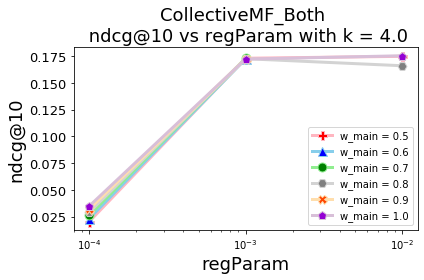

In [23]:
### Visualization of hyperparameters tuning

fig, ax = plt.subplots(1,1, figsize = fig_size)
CollectiveMF_Both_ndcg.sort_values("reg_param", inplace=True)
for i in range(len(w_main)):
    labelstring = 'w_main = '+ str(w_main[i])
    ax.semilogx('reg_param', 'value', 
            data = CollectiveMF_Both_ndcg.loc[(CollectiveMF_Both_ndcg['k'] == 4.0)&(CollectiveMF_Both_ndcg['w_main']== w_main[i])],
            marker= marker[i], markerfacecolor= markerfacecolor[i], markersize=9,
            color= color[i], linewidth=3, label = labelstring)

ax.legend()
ax.set_ylabel('ndcg@10',fontsize = 18)
ax.set_xlabel('regParam',fontsize = 18)
ax.set_title('CollectiveMF_Both \n ndcg@10 vs regParam with k = 4.0',fontsize = 18)
ax.set_xticks(reg_param)
ax.xaxis.set_tick_params(labelsize=10)
ax.yaxis.set_tick_params(labelsize=13)
pic = fig
plt.tight_layout()

In [24]:
pic.savefig('figs/hyper/CMF_ndcg_vs_reg_w_main.eps', format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


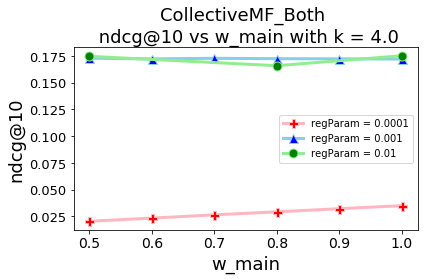

In [25]:
fig, ax = plt.subplots(1,1, figsize = fig_size)
CollectiveMF_Both_ndcg = CollectiveMF_Both_ndcg.sort_values('w_main')
for i in range(len(reg_param)):
    labelstring = 'regParam = '+ str(reg_param[i])
    ax.plot('w_main', 'value', 
            data = CollectiveMF_Both_ndcg.loc[(CollectiveMF_Both_ndcg['k'] == 4.0)&(CollectiveMF_Both_ndcg['reg_param']== reg_param[i])],
            marker= marker[i], markerfacecolor= markerfacecolor[i], markersize=9,
            color= color[i], linewidth=3, label = labelstring)

ax.legend()
ax.set_ylabel('ndcg@10',fontsize = 18)
ax.set_xlabel('w_main',fontsize = 18)
ax.set_title('CollectiveMF_Both \n ndcg@10 vs w_main with k = 4.0',fontsize = 18)
ax.set_xticks(w_main)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=13)
pic = fig
plt.tight_layout()

In [26]:
pic.savefig('figs/hyper/CMF_ndcg_vs_w_main_reg.eps', format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


### New server

In [27]:
new_split = split_params(new)[['model','metric','value','params_name','params_val']]

In [28]:
Test_implicit_set = new_split[new_split['model'] == 'BPR']
FMItem_set = new_split[new_split['model'] == 'FMItem']
FMNone_set = new_split[new_split['model'] == 'FMNone']

## Test_implicit

In [29]:
Test_implicit_set_ndcg = Test_implicit_set[Test_implicit_set['metric'] == 'ndcg@10']

In [30]:
Test_implicit_set_ndcg = Test_implicit_set_ndcg.pivot(index="value", 
                                                      columns='params_name', 
                                                      values='params_val').reset_index(inplace = False)

In [31]:
Test_implicit_set_ndcg = Test_implicit_set_ndcg[Test_implicit_set_ndcg.iteration > 20].copy()

In [35]:
regularization = [0.001,0.005, 0.01 ]
learning_rate = [0.0001, 0.001, 0.005]
factors = [4,8,16]

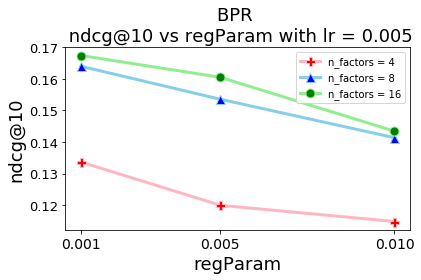

In [36]:
Test_implicit_set_ndcg.sort_values('regularization', inplace=True)
fig, ax = plt.subplots(1,1, figsize = fig_size)
for i in range(len(factors)):
    labelstring = 'n_factors = '+ str(factors[i])
    ax.plot('regularization', 'value', 
        data = Test_implicit_set_ndcg.loc[(Test_implicit_set_ndcg['learning_rate'] == 0.005)&(Test_implicit_set_ndcg['factors']== factors[i])],
            marker= marker[i], markerfacecolor=markerfacecolor[i], markersize=9,
            color= color[i], linewidth=3, label = labelstring)
ax.legend() 
ax.set_ylabel('ndcg@10',fontsize = 18)
ax.set_xlabel('regParam',fontsize = 18)
ax.set_title('BPR \n ndcg@10 vs regParam with lr = 0.005',fontsize = 18)
ax.set_xticks([1e-3, 5e-3, 1e-2])
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=13)
pic = fig
plt.tight_layout()

In [37]:
pic.savefig('figs/hyper/BPR_ndcg_vs_reg_factors.eps', format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


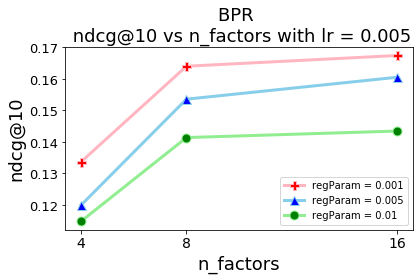

In [38]:
Test_implicit_set_ndcg.sort_values('factors', inplace=True)
fig, ax = plt.subplots(1,1, figsize = fig_size)
for i in range(len(regularization)):
    labelstring = 'regParam = '+ str(regularization[i])
    ax.plot('factors', 'value', 
        data = Test_implicit_set_ndcg.loc[(Test_implicit_set_ndcg['learning_rate'] == 0.005)&
                                          (Test_implicit_set_ndcg.regularization== regularization[i])],
            marker= marker[i], markerfacecolor=markerfacecolor[i], markersize=9,
            color= color[i], linewidth=3, label = labelstring)
ax.legend() 
ax.set_ylabel('ndcg@10',fontsize = 18)
ax.set_xlabel('n_factors',fontsize = 18)
ax.set_title('BPR \n ndcg@10 vs n_factors with lr = 0.005',fontsize = 18)
ax.set_xticks(factors)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=13)
pic = fig
plt.tight_layout()

In [39]:
pic.savefig('figs/hyper/BPR_ndcg_vs_factors_reg.eps', format='eps',fontsize = 18)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


## FMItem

In [40]:
FMItem_set_ndcg = FMItem_set[FMItem_set['metric'] == 'ndcg@10']

In [41]:
FMItem_set_ndcg = FMItem_set_ndcg.pivot(index="value", 
                                        columns='params_name', 
                                        values='params_val').reset_index(inplace = False)

In [42]:
FMItem_set_ndcg = FMItem_set_ndcg[(FMItem_set_ndcg.n_iter == 100) & (FMItem_set_ndcg["rank"] <= 4)].copy()

In [43]:
FMItem_set_ndcg

params_name,value,l2_reg_V,l2_reg_w,model_info_used,n_iter,rank
10,0.025579,0.1,0.1,Item,100,4
19,0.030641,0.2,0.2,Item,100,4
21,0.034199,0.3,0.3,Item,100,4
23,0.038992,0.5,0.5,Item,100,4
24,0.039631,0.1,0.1,Item,100,2
26,0.042422,0.2,0.2,Item,100,2
27,0.042760,0.8,0.8,Item,100,4
28,0.043644,0.9,0.9,Item,100,4
29,0.043940,0.3,0.3,Item,100,2
30,0.044508,1,1,Item,100,4


In [44]:
color = ['lightpink','skyblue','lightgreen', "lightgrey", "navajowhite", "thistle"]
markerfacecolor = ['red', 'blue', 'green','grey', "orangered", "darkviolet" ]
marker = ['P', '^' ,'o', "H", "X", "p"]
reg = [0.2, 0.3, 0.5, 0.8, 0.9, 1]
fct = [2,4]

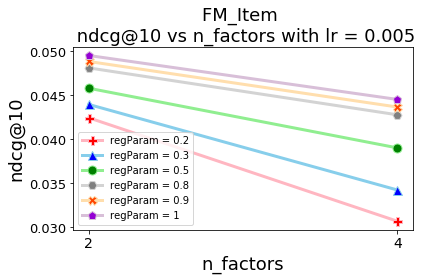

In [45]:
FMItem_set_ndcg.sort_values('l2_reg_V', inplace=True)
fig, ax = plt.subplots(1,1, figsize = fig_size)
for i in range(len(reg)):
    labelstring = 'regParam = '+ str(reg[i])
    ax.plot('rank', 'value', 
        data = FMItem_set_ndcg.loc[(FMItem_set_ndcg.l2_reg_V == reg[i])&
                                  (FMItem_set_ndcg.l2_reg_w == reg[i])],
            marker= marker[i], markerfacecolor=markerfacecolor[i], markersize=9,
            color= color[i], linewidth=3, label = labelstring)
ax.legend() 
ax.set_ylabel('ndcg@10',fontsize = 18)
ax.set_xlabel('n_factors',fontsize = 18)
ax.set_title('FM_Item \n ndcg@10 vs n_factors with lr = 0.005',fontsize = 18)
ax.set_xticks(fct)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=13)
pic = fig
plt.tight_layout()

In [46]:
pic.savefig('figs/hyper/FM_ndcg_vs_factors_reg.eps', format='eps',fontsize = 18)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


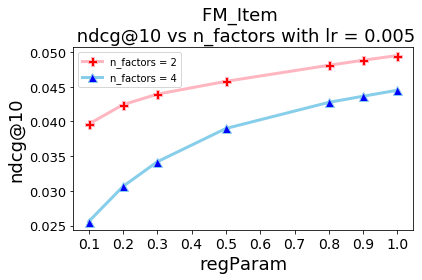

In [47]:
FMItem_set_ndcg.sort_values('rank', inplace=True)
fig, ax = plt.subplots(1,1, figsize = fig_size)
for i in range(len(fct)):
    labelstring = 'n_factors = '+ str(fct[i])
    ax.plot('l2_reg_V', 'value', 
        data = FMItem_set_ndcg.loc[(FMItem_set_ndcg["rank"] == fct[i])],
            marker= marker[i], markerfacecolor=markerfacecolor[i], markersize=9,
            color= color[i], linewidth=3, label = labelstring)
ax.legend() 
ax.set_ylabel('ndcg@10',fontsize = 18)
ax.set_xlabel('regParam',fontsize = 18)
ax.set_title('FM_Item \n ndcg@10 vs n_factors with lr = 0.005',fontsize = 18)
ax.set_xticks(np.arange(0.1, 1.1, 0.1))
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=13)
pic = fig
plt.tight_layout()

In [48]:
pic.savefig('figs/hyper/FM_ndcg_vs_reg_factors.eps', format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
